**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
![art8.png](art8.png)
art8lab1.png: 
![art8lab1.png](art8lab1.png)
art8lab2.png: 
![art8lab2.png](art8lab2.png)
		
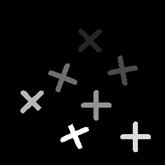
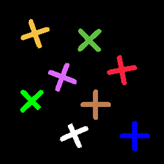
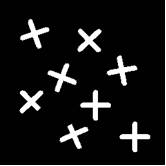

Tamanho da imagem :  (256, 256)
Imagem com range maximo : 255 


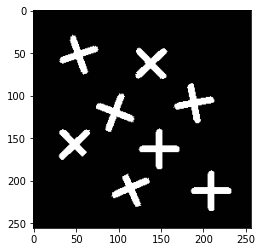

In [18]:
# code here
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

print('Tamanho da imagem : ',img.shape)
print(f'Imagem com range maximo : {img.max()} ')

linhas = img.shape[0]
colunas = img.shape[1]


Number of connected components: 9


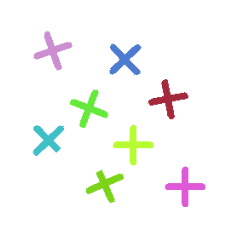

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def label_components(image):
    labels = np.zeros_like(image)
    label_count = 0

    def get_neighbors(i, j):
        neighbors = []
        if i > 0:
            neighbors.append((i - 1, j))
        if i < image.shape[0] - 1:
            neighbors.append((i + 1, j))
        if j > 0:
            neighbors.append((i, j - 1))
        if j < image.shape[1] - 1:
            neighbors.append((i, j + 1))
        return neighbors

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] == 255 and labels[i, j] == 0:
                label_count += 1
                stack = [(i, j)]

                while stack:
                    current_i, current_j = stack.pop()
                    labels[current_i, current_j] = label_count

                    for neighbor_i, neighbor_j in get_neighbors(current_i, current_j):
                        if image[neighbor_i, neighbor_j] == 255 and labels[neighbor_i, neighbor_j] == 0:
                            stack.append((neighbor_i, neighbor_j))

    return labels, label_count

labeled_image, num_components = label_components(img)
print(f'Number of connected components: {num_components}')

colors = np.random.randint(0, 256, size=(num_components + 1, 3))
colors[0] = [255, 255, 255]

colored_image = colors[labeled_image]

plt.imshow(colored_image)
plt.axis('off')
plt.show()


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

Tamanho da imagem :  (260, 200)
Imagem com range maximo : 236 


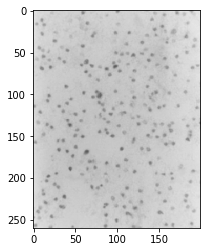

In [20]:
# code here
# code here
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

print('Tamanho da imagem : ',img.shape)
print(f'Imagem com range maximo : {img.max()} ')

linhas = img.shape[0]
colunas = img.shape[1]

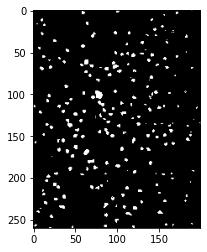

In [21]:
img[img > 167] = 254
img[img <= 167] = 253

img[img == 253] = 255
img[img == 254] = 0

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

Number of connected components: 223


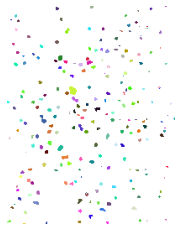

In [22]:
labeled_image, num_components = label_components(img)
print(f'Number of connected components: {num_components}')
colors = np.random.randint(0, 256, size=(num_components + 1, 3))
colors[0] = [255, 255, 255]

colored_image = colors[labeled_image]

plt.imshow(colored_image)
plt.axis('off')
plt.show()